# Objectives {.unnumbered}

By the end of this lab, you will:
1. Load and analyze the **Lightcast dataset** in **Spark DataFrame**.
2. Create **five easy and three medium-complexity visualizations** using **Plotly**.
3. Explore **salary distributions, employment trends, and job postings**.
4. Analyze **skills in relation to NAICS/SOC/ONET codes and salaries**.
5. Customize **colors, fonts, and styles** in all visualizations (**default themes result in a 2.5-point deduction**).
6. Follow **best practices for reporting on data communication**.

# Step 1: Load the Dataset {.unnumbered}


In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


# Initialize Spark Session
spark = SparkSession.builder.appName("LightcastData").getOrCreate()

# Load Data
df = spark.read.option("header", "true").option("inferSchema", "true").option("multiLine","true").option("escape", "\"").csv("lightcast_job_postings.csv")

# Show Schema and Sample Data
df.printSchema()
df.show(5)


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/26 19:58:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- ID: string (nullable = true)
 |-- LAST_UPDATED_DATE: string (nullable = true)
 |-- LAST_UPDATED_TIMESTAMP: timestamp (nullable = true)
 |-- DUPLICATES: integer (nullable = true)
 |-- POSTED: string (nullable = true)
 |-- EXPIRED: string (nullable = true)
 |-- DURATION: integer (nullable = true)
 |-- SOURCE_TYPES: string (nullable = true)
 |-- SOURCES: string (nullable = true)
 |-- URL: string (nullable = true)
 |-- ACTIVE_URLS: string (nullable = true)
 |-- ACTIVE_SOURCES_INFO: string (nullable = true)
 |-- TITLE_RAW: string (nullable = true)
 |-- BODY: string (nullable = true)
 |-- MODELED_EXPIRED: string (nullable = true)
 |-- MODELED_DURATION: integer (nullable = true)
 |-- COMPANY: integer (nullable = true)
 |-- COMPANY_NAME: string (nullable = true)
 |-- COMPANY_RAW: string (nullable = true)
 |-- COMPANY_IS_STAFFING: boolean (nullable = true)
 |-- EDUCATION_LEVELS: string (nullable = true)
 |-- EDUCATION_LEVELS_NAME: string (nullable = true)
 |-- MIN_EDULEVELS: integer (

25/03/26 19:58:22 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+-----------------+----------------------+----------+--------+---------+--------+--------------------+--------------------+--------------------+-----------+-------------------+--------------------+--------------------+---------------+----------------+--------+--------------------+-----------+-------------------+----------------+---------------------+-------------+-------------------+-------------+------------------+---------------+--------------------+--------------------+--------------------+-------------+------+-----------+----------------+-------------------+---------+-----------+--------------------+--------------------+-------------+------+--------------+-----+--------------------+-----+----------+---------------+--------------------+---------------+--------------------+------------+--------------------+------------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+------

# Salary Distribution by Employment Type
- Identify salary trends across different employment types.
- **Filter the dataset**
  - Remove records where **salary is missing or zero**.
- **Aggregate Data**
  - Group by **employment type** and compute salary distribution.
- **Visualize results**
  - Create a **box plot** where:
    - **X-axis** = `EMPLOYMENT_TYPE_NAME`
    - **Y-axis** = `SALARY_FROM`
  - Customize **colors, fonts, and styles** to avoid a **2.5-point deduction**.
- **Explanation:** Write two sentences about what the graph reveals.



In [2]:
# Your Code for 1st question here
df_filtered = df.filter((df["SALARY_FROM"].isNotNull()) & (df["SALARY_FROM"] > 0))
pdf = df_filtered.select("EMPLOYMENT_TYPE_NAME", "SALARY_FROM").toPandas()
fig = px.box(pdf, x="EMPLOYMENT_TYPE_NAME", y="SALARY_FROM", title="Salary Distribution by Employment Type", color_discrete_sequence=["#636EFA"])
fig.update_layout(font_family="Arial", title_font_size=16)
fig.show()

The graph reveals that full time employees generally get higher salaries than part-time employees. Part-time employees generally get lower salaries than even the part-time/full-time hybrid group. 

# Salary Distribution by Industry
- Compare salary variations across industries.
- **Filter the dataset**
  - Keep records where **salary is greater than zero**.
- **Aggregate Data**
  - Group by **NAICS industry codes**.
- **Visualize results**
  - Create a **box plot** where:
    - **X-axis** = `NAICS2_NAME`
    - **Y-axis** = `SALARY_FROM`
  - Customize colors, fonts, and styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [3]:
# Your code for 2nd question here
pdf_2 = df_filtered.select("NAICS2_NAME", "SALARY_FROM").toPandas()
fig_2 = px.box(pdf_2, x="NAICS2_NAME", y="SALARY_FROM", title="Salary Distribution by Industry Type", color_discrete_sequence=["#636EFA"])
fig_2.update_layout(font_family="Arial", title_font_size=15)
fig_2.show()

This graph shows that salaries of jobs in the Administrative and Support and Waste Management and Remediation Services tend to be higher than those in other industries. Jobs in that industry have the possibility and potential to earn very high salaries. 

# Job Posting Trends Over Time
- Analyze how job postings fluctuate over time.
- **Aggregate Data**
  - Count job postings per **posted date (`POSTED`)**.
- **Visualize results**
  - Create a **line chart** where:
    - **X-axis** = `POSTED`
    - **Y-axis** = `Number of Job Postings`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [6]:
import matplotlib.pyplot as plt

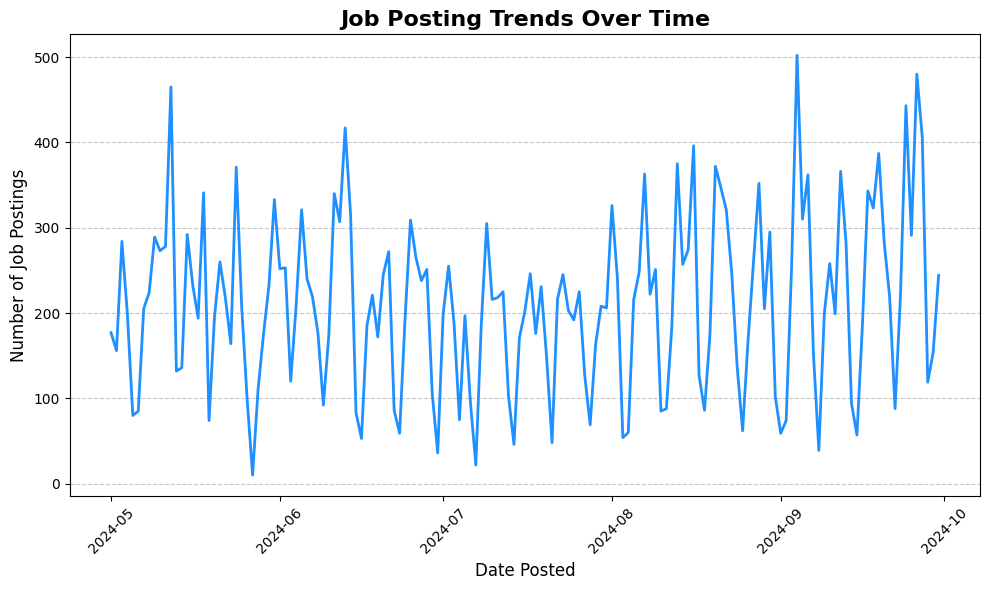

In [5]:
# Your code for 3rd question here
df_filtered = df_filtered.select("POSTED").na.drop()
df_3 = df_filtered.groupBy("POSTED").count()
df_3 = df_3.withColumnRenamed("count", "Number_of_Postings")
pdf_3 = df_3.toPandas()
pdf_3["POSTED"] = pd.to_datetime(pdf_3["POSTED"])
pdf_3 = pdf_3.sort_values(by="POSTED")
plt.figure(figsize=(10, 6))
plt.plot(pdf_3["POSTED"], pdf_3["Number_of_Postings"], color="dodgerblue", linewidth=2)
plt.title("Job Posting Trends Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Date Posted", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


The line chart shows that the number of jobs posted fluctuated a lot, but tended to peak in the middle of a month. The average number of jobs posted per day during the period from 2024-05 to 2024-10 was around 200 jobs. 

# Top 10 Job Titles by Count
- Identify the most frequently posted job titles.
- **Aggregate Data**
  - Count the occurrences of each **job title (`TITLE_NAME`)**.
  - Select the **top 10 most frequent titles**.
- **Visualize results**
  - Create a **bar chart** where:
    - **X-axis** = `TITLE_NAME`
    - **Y-axis** = `Job Count`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

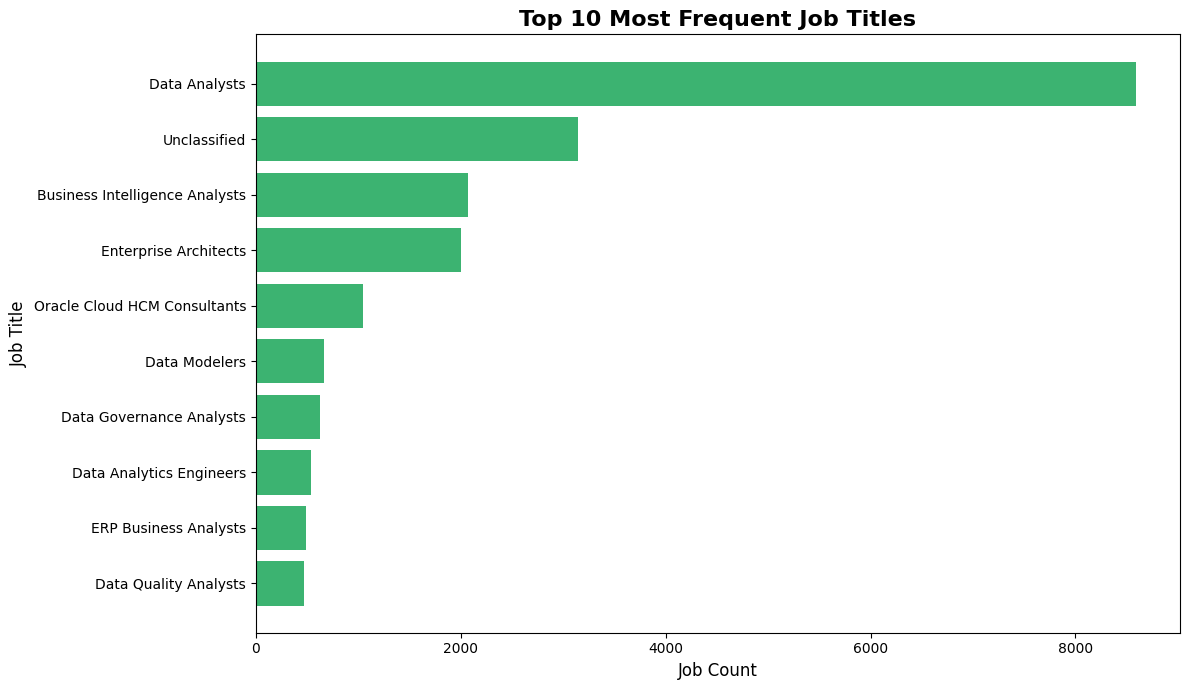

In [6]:
# Your code for 4th question here
df_filtered = df.select("TITLE_NAME").na.drop()
df_4 = df_filtered.groupBy("TITLE_NAME").count()
df_4 = df_4.withColumnRenamed("count", "Job_Count")
df_top10 = df_4.orderBy("Job_Count", ascending=False).limit(10)
pdf_top10 = df_top10.toPandas()
pdf_top10 = pdf_top10.sort_values(by="Job_Count", ascending=True)
plt.figure(figsize=(12, 7))
plt.barh(pdf_top10["TITLE_NAME"], pdf_top10["Job_Count"], color="mediumseagreen")
plt.title("Top 10 Most Frequent Job Titles", fontsize=16, fontweight="bold")
plt.xlabel("Job Count", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

The bar chart shows that Data Analyst is the most commonly posted job title. Among the 10 most common job titles, one can observe that "Analyst" is highly demanded by companies (half the top-10 job titles include the word Analyst). 

# Remote vs On-Site Job Postings
- Compare the proportion of remote and on-site job postings.
- **Aggregate Data**
  - Count job postings by **remote type (`REMOTE_TYPE_NAME`)**.
- **Visualize results**
  - Create a **pie chart** where:
    - **Labels** = `REMOTE_TYPE_NAME`
    - **Values** = `Job Count`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

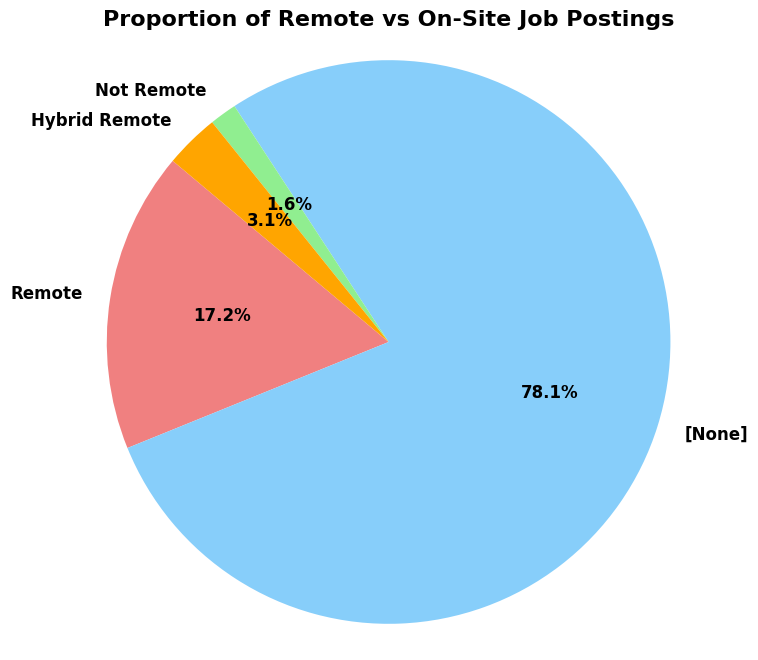

In [7]:
# Your code for 5th question here
df_filtered = df.select("REMOTE_TYPE_NAME").na.drop()
df_5 = df_filtered.groupBy("REMOTE_TYPE_NAME").count()
df_5 = df_5.withColumnRenamed("count", "Job_Count")
pdf_remote = df_5.toPandas()
colors = ["lightcoral", "lightskyblue", "lightgreen", "orange"]
plt.figure(figsize=(8, 8))
plt.pie(
    pdf_remote["Job_Count"],
    labels=pdf_remote["REMOTE_TYPE_NAME"],
    autopct="%1.1f%%",
    colors=colors,
    startangle=140,
    textprops={"fontsize": 12, "fontweight": "bold"}
)

plt.title("Proportion of Remote vs On-Site Job Postings", fontsize=16, fontweight="bold")
plt.axis("equal")
plt.show()


The graph shows the proportion of jobs that are remote or not remote. The graph reveals that 17.2% jobs are remote and 3.1% hybrid-remote, showing the growing prevalence of remote working. 

# Skill Demand Analysis by Industry (Stacked Bar Chart)
- Identify which skills are most in demand in various industries.
- **Aggregate Data**
  - Extract **skills** from job postings.
  - Count occurrences of skills grouped by **NAICS industry codes**.
- **Visualize results**
  - Create a **stacked bar chart** where:
    - **X-axis** = `Industry`
    - **Y-axis** = `Skill Count`
    - **Color** = `Skill`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [8]:
df.select('SKILLS_NAME').show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
import seaborn as sns

In [ ]:
# Your code for 6th question here
skills_by_industry = (
    df.groupBy("NAICS2_NAME", "SKILLS_NAME")
    .count()
    .orderBy("NAICS2_NAME", "count", ascending=[True, False])
)
skills_df = skills_by_industry.toPandas()

In [14]:
pivot_df = skills_df.pivot_table(
    index="NAICS2_NAME", columns="SKILLS_NAME", values="count", fill_value=0
)

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")

pivot_df.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 8),
    colormap="Set3" 
)

plt.title("Most In-Demand Skills by Industry", fontsize=14, fontweight="bold")
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Skill Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Skills", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


# Salary Analysis by ONET Occupation Type (Bubble Chart)
- Analyze how salaries differ across ONET occupation types.
- **Aggregate Data**
  - Compute **median salary** for each occupation in the **ONET taxonomy**.
- **Visualize results**
  - Create a **bubble chart** where:
    - **X-axis** = `ONET_NAME`
    - **Y-axis** = `Median Salary`
    - **Size** = Number of job postings
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [3]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

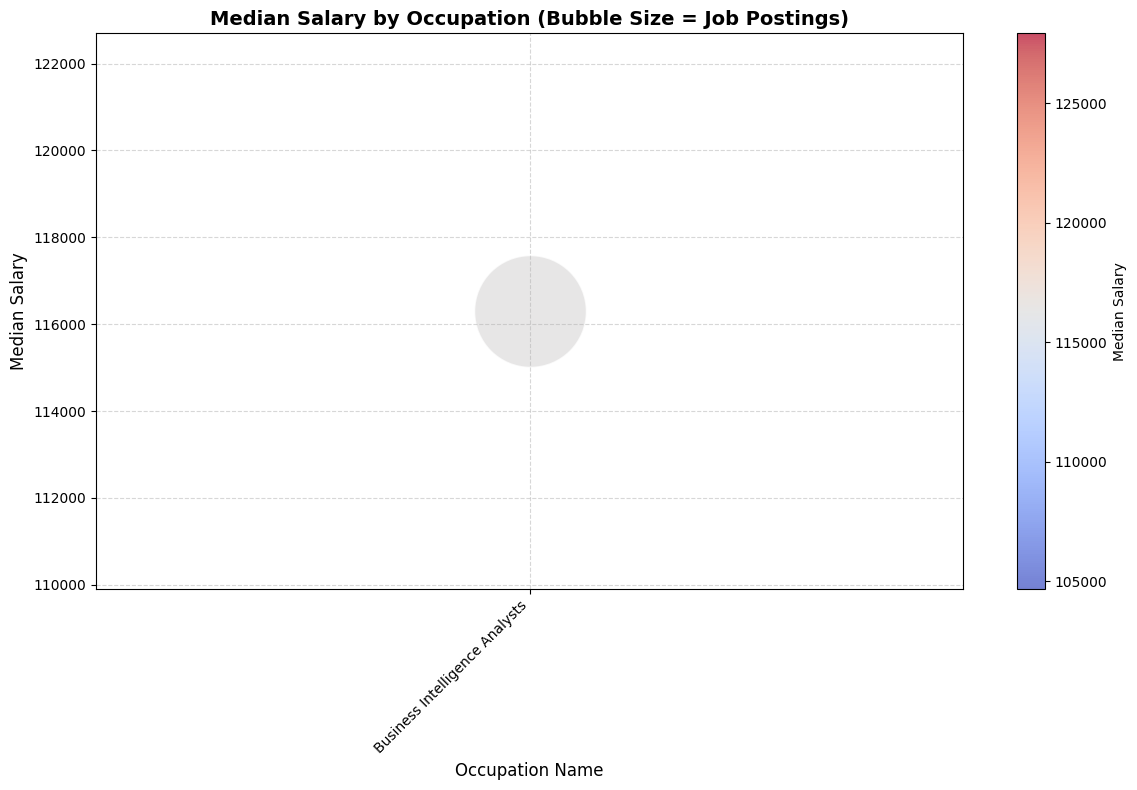

In [9]:
# Your code for 7th question here
median_salary_df = (
    df_filtered.groupBy("ONET_NAME")
    .agg(
        F.expr("percentile_approx(SALARY, 0.5)").alias("median_salary"),
        F.count("*").alias("job_count")
    )
)

median_salary_pd = median_salary_df.toPandas()

plt.figure(figsize=(12, 8))

bubble = plt.scatter(
    x=median_salary_pd["ONET_NAME"],
    y=median_salary_pd["median_salary"],
    s=median_salary_pd["job_count"] / 5, 
    c=median_salary_pd["median_salary"],
    cmap="coolwarm",  
    alpha=0.7,
    edgecolors="w",
    linewidth=1
)

cbar = plt.colorbar(bubble)
cbar.set_label("Median Salary")

plt.title("Median Salary by Occupation (Bubble Size = Job Postings)", fontsize=14, fontweight="bold")
plt.xlabel("Occupation Name", fontsize=12)
plt.ylabel("Median Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


# Career Pathway Trends (Sankey Diagram)
- Visualize job transitions between different occupation levels.
- **Aggregate Data**
  - Identify career transitions between **SOC job classifications**.
- **Visualize results**
  - Create a **Sankey diagram** where:
    - **Source** = `SOC_2021_2_NAME`
    - **Target** = `SOC_2021_3_NAME`
    - **Value** = Number of transitions
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [10]:
# Your code for 8th question here
transitions_df = (
    df_filtered.groupBy("SOC_2021_2_NAME", "SOC_2021_3_NAME")
    .agg(F.count("*").alias("num_transitions"))
    .filter(F.col("SOC_2021_2_NAME").isNotNull() & F.col("SOC_2021_3_NAME").isNotNull())
)

transitions_pd = transitions_df.toPandas()

import plotly.graph_objects as go

sources = transitions_pd["SOC_2021_2_NAME"].tolist()
targets = transitions_pd["SOC_2021_3_NAME"].tolist()
values = transitions_pd["num_transitions"].tolist()

all_labels = list(set(sources + targets))
label_to_index = {label: i for i, label in enumerate(all_labels)}

source_indices = [label_to_index[src] for src in sources]
target_indices = [label_to_index[tgt] for tgt in targets]

fig = go.Figure(
    go.Sankey(
        node=dict(
            pad=20,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_labels, 
            color="lightblue",
        ),
        link=dict(
            source=source_indices,
            target=target_indices,
            value=values,
            color="rgba(31, 119, 180, 0.5)", 
        ),
    )
)

fig.update_layout(
    title_text="Career Transitions Between SOC Job Classifications",
    font=dict(size=12, family="Arial"),
    plot_bgcolor="white",
)

fig.show()

In [12]:
fig.write_image("_output/figure.svg")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
